In [35]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
from wordcloud import WordCloud

C:\Users\kaod_\AppData\Roaming\Python\Python310\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [8]:
# cargando los csv

coursera_courses = pd.read_csv('Coursera_courses.csv')
coursera_reviews = pd.read_csv('Coursera_reviews.csv')
edx_courses = pd.read_csv('edx_courses.csv')
udemy_courses = pd.read_csv('udemy_courses.csv')

# Echando un vistazo a los dataframes...

## coursera_courses

In [9]:
# dándole una checadita...
coursera_courses.head()

,name,institution,course_url,course_id
0,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning
1,Indigenous Canada,University of Alberta,https://www.coursera.org/learn/indigenous-canada,indigenous-canada
2,The Science of Well-Being,Yale University,https://www.coursera.org/learn/the-science-of-...,the-science-of-well-being
3,Technical Support Fundamentals,Google,https://www.coursera.org/learn/technical-suppo...,technical-support-fundamentals
4,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...,google-cbrs-cpi-training


In [48]:
# dimensiones de este dataframe
coursera_courses.shape

(623, 4)

In [49]:
# Tipos de datos de cada columnda de coursera_courses
coursera_courses.dtypes

name           object
institution    object
course_url     object
course_id      object
dtype: object

In [101]:
# descripción
print('las dimensiones del df son: ', coursera_courses.shape)
coursera_courses.describe()

las dimensiones del df son:  (623, 4)


,name,institution,course_url,course_id
count,623,623,623,623
unique,622,134,623,623
top,Introduction to Psychology,University of Pennsylvania,https://www.coursera.org/learn/machine-learning,machine-learning
freq,2,43,1,1


In [45]:
# campos vacíos de coursera courses
coursera_courses.isnull().sum()

name           0
institution    0
course_url     0
course_id      0
dtype: int64

In [119]:
# duplicados
coursera_courses.duplicated().sum()

0

In [61]:
''' 
Se ve que en el campo name, hay un solo valor que se repite ('Introduction to Psychology), pues existen 623 filas
y hay 622 valores únicos. Hay 134 instituciones, y por supuesto, todas las url y los id son únicos.
'''
coursera_courses['name'].value_counts()

Introduction to Psychology                                                2
Machine Learning                                                          1
Career 911: Your Future Job in Medicine and Healthcare                    1
Introduction to Trading, Machine Learning & GCP                           1
Python Programming: A Concise Introduction                                1
                                                                         ..
Building Scalable Java Microservices with Spring Boot and Spring Cloud    1
Introduction to Forensic Science                                          1
Google Cloud Product Fundamentals                                         1
American Contract Law I                                                   1
A Crash Course in Data Science                                            1
Name: name, Length: 622, dtype: int64

## coursera_reviews

In [50]:
# header
coursera_reviews.head()

,reviews,reviewers,date_reviews,rating,course_id
0,"Pretty dry, but I was able to pass with just t...",By Robert S,"Feb 12, 2020",4,google-cbrs-cpi-training
1,would be a better experience if the video and ...,By Gabriel E R,"Sep 28, 2020",4,google-cbrs-cpi-training
2,Information was perfect! The program itself wa...,By Jacob D,"Apr 08, 2020",4,google-cbrs-cpi-training
3,A few grammatical mistakes on test made me do ...,By Dale B,"Feb 24, 2020",4,google-cbrs-cpi-training
4,Excellent course and the training provided was...,By Sean G,"Jun 18, 2020",4,google-cbrs-cpi-training


In [104]:
len(coursera_reviews['course_id'].unique())

604

In [51]:
# dimensiones
coursera_reviews.shape

(1454711, 5)

In [54]:
# tipos de datos
''' de aquí vemos que sería útil formatear la fecha, y también revisar el course_id '''
coursera_reviews.dtypes

reviews         object
reviewers       object
date_reviews    object
rating           int64
course_id       object
dtype: object

In [65]:
coursera_reviews.describe()

,rating
count,1.454711e+06
mean,4.696649e+00
std,6.983271e-01
min,1.000000e+00
25%,5.000000e+00
50%,5.000000e+00
75%,5.000000e+00
max,5.000000e+00


In [53]:
# campos vacíos de coursera_reviews
''' podríamos prescindir de los nulos al no ser representativos respecto al número total de filas'''
coursera_reviews.isnull().sum()

reviews         140
reviewers         0
date_reviews      0
rating            0
course_id         0
dtype: int64

In [115]:
# cantdad de valores duplicados
''' 
habría que eliminar duplicados
'''
coursera_reviews.duplicated().sum()

934764

In [116]:
# por ejemplo
coursera_reviews[(coursera_reviews['reviews'] == 'G') & (coursera_reviews['reviewers'] == 'By Reza S') & 
                 (coursera_reviews['rating'] == 5)]

,reviews,reviewers,date_reviews,rating,course_id
73690,G,By Reza S,"Aug 12, 2018",5,computer-networking
1454688,G,By Reza S,"Aug 12, 2018",5,computer-networking
1454710,G,By Reza S,"Aug 12, 2018",5,computer-networking


In [55]:
# valores diferentes por columna para coursera reviews
print(len(coursera_reviews['reviews'].unique()))
print(len(coursera_reviews['reviewers'].unique()))
print(len(coursera_reviews['rating'].unique()))
print(len(coursera_reviews['course_id'].unique()))

458278
287808
5
604


In [62]:
# aquí hay que formatear datos en la limpieza
coursera_reviews['reviews'].value_counts()

good                                                                                                                                                                                                                                                                                                                                                          8827
Good                                                                                                                                                                                                                                                                                                                                                          5445
Excellent                                                                                                                                                                                                                                                                                         

In [63]:
# para los más de 200,000 reviewers
coursera_reviews['reviewers'].value_counts()

By Deleted A     5412
By Muhammad A     649
By Abhishek S     440
By David M        435
By Michael S      431
                 ... 
By Calvin N         1
By Kachan O V       1
By Tan S X A        1
By Yusong S         1
By Yu-Jhen-Wu       1
Name: reviewers, Length: 287808, dtype: int64

<AxesSubplot:>

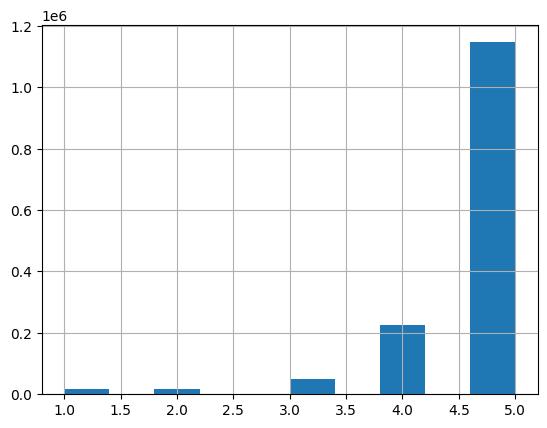

In [64]:
# histograma de la columna 'rating'. Vemos que la gran mayoría son reseñas de 5 puntos
coursera_reviews['rating'].hist(bins=10)

## edx_courses dataframe

In [235]:
# edx_courses

edx_courses.head()


,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url
0,How to Learn Online,Learn essential strategies for successful onli...,"124,980",Self-paced on your time,edX,Nina Huntemann-Robyn Belair-Ben Piscopo,Introductory,Education & Teacher Training,English,English,2–3 hours per week,2 Weeks,FREE-Add a Verified Certificate for $49 USD,"Designed for those who are new to elearning, t...",Welcome - We start with opportunities to meet ...,https://www.edx.org/course/how-to-learn-online
1,Programming for Everybody (Getting Started wit...,"This course is a ""no prerequisite"" introductio...","293,864",Self-paced on your time,The University of Michigan,Charles Severance,Introductory,Computer Science,English,English,2–4 hours per week,7 Weeks,FREE-Add a Verified Certificate for $49 USD,This course aims to teach everyone the basics ...,NaN,https://www.edx.org/course/programming-for-eve...
2,CS50's Introduction to Computer Science,An introduction to the intellectual enterprise...,"2,442,271",Self-paced on your time,Harvard University,David J. Malan-Doug Lloyd-Brian Yu,Introductory,Computer Science,English,English,6–18 hours per week,12 Weeks,FREE-Add a Verified Certificate for $90 USD,"This is CS50x , Harvard University's introduct...",NaN,https://www.edx.org/course/cs50s-introduction-...
3,The Analytics Edge,"Through inspiring examples and stories, discov...","129,555",Instructor-led on a course schedule,Massachusetts Institute of Technology,Dimitris Bertsimas-Allison O'Hair-John Silberh...,Intermediate,Data Analysis & Statistics,English,English,10–15 hours per week,13 Weeks,FREE-Add a Verified Certificate for $199 USD,"In the last decade, the amount of data availab...",NaN,https://www.edx.org/course/the-analytics-edge
4,Marketing Analytics: Marketing Measurement Str...,This course is part of a MicroMasters® Program,"81,140",Self-paced on your time,"University of California, Berkeley",Stephan Sorger,Introductory,Computer Science,English,English,5–7 hours per week,4 Weeks,FREE-Add a Verified Certificate for $249 USD,Begin your journey in a new career in marketin...,NaN,https://www.edx.org/course/marketing-analytics...


In [ ]:
''' checar course_effort para poder cuantizar variables
    formatear course_length
    formnatear el título de la columna Level
    formatear price
    checar course syllabus
    se podría eliminar la columna syllabus '''

In [236]:
# dimensiones de edx_courses
edx_courses.shape

(975, 16)

In [237]:
# tipo de datos

edx_courses.dtypes

title                 object
summary               object
n_enrolled            object
course_type           object
institution           object
instructors           object
Level                 object
subject               object
language              object
subtitles             object
course_effort         object
course_length         object
price                 object
course_description    object
course_syllabus       object
course_url            object
dtype: object

In [238]:
# descripción
print(' a considerar siempre las dimensiones: ', edx_courses.shape)
edx_courses.describe()

 a considerar siempre las dimensiones:  (975, 16)


,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url
count,975,922,855,975,975,972,975,975,975,972,975,975,975,935,417,975
unique,972,887,849,2,111,775,3,31,9,33,53,18,47,932,412,974
top,Introduction to Probability,This course is part of a MicroMasters® Program,"97,291",Self-paced on your time,Harvard University,Rafael Irizarry,Introductory,Computer Science,English,English,2–4 hours per week,4 Weeks,FREE-Add a Verified Certificate for $49 USD,"About the Database Series of Courses""Databases...",Course Outline:,https://www.edx.org/course/introduction-to-pro...
freq,2,15,2,917,104,9,621,166,777,713,108,194,270,3,3,2


In [239]:
edx_courses['language'].value_counts()

English          777
Español          176
Français           7
Italiano           4
中文                 4
Português          4
日本語                1
اللغة العربية      1
Deutsch            1
Name: language, dtype: int64

In [ ]:
'''
formatear n_enrolled
'''

In [240]:
# valores nulos
edx_courses.isnull().sum()

title                   0
summary                53
n_enrolled            120
course_type             0
institution             0
instructors             3
Level                   0
subject                 0
language                0
subtitles               3
course_effort           0
course_length           0
price                   0
course_description     40
course_syllabus       558
course_url              0
dtype: int64

In [241]:
# valores duplicados
''' 
hay que eliminar duplicados
'''
edx_courses.duplicated().sum()

1

In [242]:
# valor duplicado
edx_courses[(edx_courses['title'] == 'Introduction to Probability') & (edx_courses['n_enrolled'] == '97,291')]

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url
59,Introduction to Probability,"Learn probability, an essential language and s...","97,291",Self-paced on your time,Harvard University,Joseph Blitzstein,Intermediate,Data Analysis & Statistics,English,English,5–10 hours per week,10 Weeks,FREE-Add a Verified Certificate for $99 USD,Probability and statistics help to bring logic...,NaN,https://www.edx.org/course/introduction-to-pro...
95,Introduction to Probability,"Learn probability, an essential language and s...","97,291",Self-paced on your time,Harvard University,Joseph Blitzstein,Intermediate,Data Analysis & Statistics,English,English,5–10 hours per week,10 Weeks,FREE-Add a Verified Certificate for $99 USD,Probability and statistics help to bring logic...,NaN,https://www.edx.org/course/introduction-to-pro...


In [243]:
# histogramas
edx_courses.hist(bins=50, figsize=(20,15))

ValueError: hist method requires numerical or datetime columns, nothing to plot.

In [ ]:
# para obtener gráficos de dispersión y la matrizde correlación, es necesario tener datos numéricos.

## udemy_courses

In [12]:
# udemy
udemy_courses.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [ ]:
'''
formatear published_timestamp. Quizá se tenga que partir en dos columnas, una de fecha y otra de hora
'''

In [86]:
# dimensiones de udemy_courses
udemy_courses.shape

(3678, 12)

In [24]:
udemy_courses.dtypes

course_id                int64
course_title            object
url                     object
is_paid                   bool
price                    int64
num_subscribers          int64
num_reviews              int64
num_lectures             int64
level                   object
content_duration       float64
published_timestamp     object
subject                 object
dtype: object

In [87]:
# la descripción
udemy_courses.describe()

,course_id,price,num_subscribers,num_reviews,num_lectures,content_duration
count,3.678000e+03,3678.000000,3678.000000,3678.000000,3678.000000,3678.000000
mean,6.759720e+05,66.049483,3197.150625,156.259108,40.108755,4.094517
std,3.432732e+05,61.005755,9504.117010,935.452044,50.383346,6.053840
min,8.324000e+03,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.076925e+05,20.000000,111.000000,4.000000,15.000000,1.000000
50%,6.879170e+05,45.000000,911.500000,18.000000,25.000000,2.000000
75%,9.613555e+05,95.000000,2546.000000,67.000000,45.750000,4.500000
max,1.282064e+06,200.000000,268923.000000,27445.000000,779.000000,78.500000


In [91]:
# valores unicos NO numéricos
print('course_title: ', len(udemy_courses['course_title'].unique()))
print('level: ', len(udemy_courses['level'].unique()))
print('published_timestamp: ', len(udemy_courses['published_timestamp'].unique()))
print('subject: ', len(udemy_courses['subject'].unique()))



course_title:  3663
level:  4
published_timestamp:  3672
subject:  4


In [95]:
# esto puede servir para medir las VENTAS

print('dimensiones del df: ', udemy_courses.shape)
print('cantidad de Falses: ', len(udemy_courses[udemy_courses['is_paid'] == False]))
print('cantidad de Trues: ', len(udemy_courses[udemy_courses['is_paid'] == True]))

dimensiones del df:  (3678, 12)
cantidad de Falses:  310
cantidad de Trues:  3368


In [34]:
udemy_courses.isnull().sum()

course_id              0
course_title           0
url                    0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

In [130]:
# registros completos duplicados
''' 
hay que eliminarlos
'''
udemy_courses.duplicated().sum()

6

array([[<AxesSubplot:title={'center':'course_id'}>,
        <AxesSubplot:title={'center':'price'}>],
       [<AxesSubplot:title={'center':'num_subscribers'}>,
        <AxesSubplot:title={'center':'num_reviews'}>],
       [<AxesSubplot:title={'center':'num_lectures'}>,
        <AxesSubplot:title={'center':'content_duration'}>]], dtype=object)

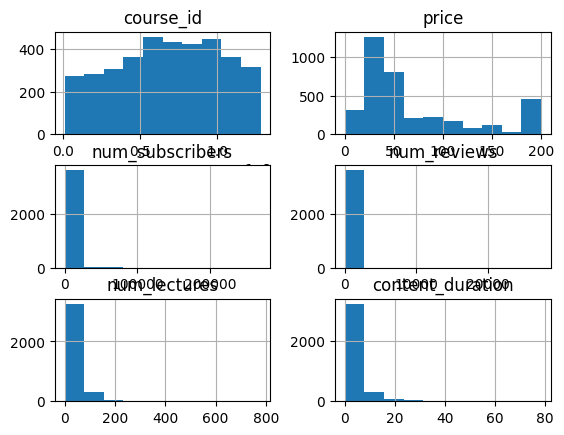

In [96]:
udemy_courses.hist()

# Limpieza de datos

## coursera_courses

Se plantea hacer un merge de este df con coursera_reviews para tener información más útil de ambos dataframes

## coursera_reviewes

Para este df, se eliminan primero los duplicados

In [133]:
coursera_reviews.shape

(1454711, 5)

In [134]:
coursera_reviews.duplicated().sum()

934764

In [135]:
coursera_reviews = coursera_reviews.drop_duplicates()

In [136]:
# confirmamos
coursera_reviews.duplicated().sum()

0

Luego, los valores nulos también se eliminan, al no ser representativos respecto a las dimensiones del dataframe

In [139]:
print('dimensiones de coursera_review después de eliminar duplicados: ', coursera_reviews.shape)
coursera_reviews.isnull().sum()

dimensiones de coursera_review después de eliminar duplicados:  (519947, 5)


reviews         56
reviewers        0
date_reviews     0
rating           0
course_id        0
dtype: int64

In [143]:
coursera_reviews = coursera_reviews.dropna()

In [145]:
coursera_reviews.isnull().sum()


reviews         0
reviewers       0
date_reviews    0
rating          0
course_id       0
dtype: int64

Formatear columna de fecha

In [146]:
# pasamos de tipo object...
coursera_reviews.head()

,reviews,reviewers,date_reviews,rating,course_id
0,"Pretty dry, but I was able to pass with just t...",By Robert S,"Feb 12, 2020",4,google-cbrs-cpi-training
1,would be a better experience if the video and ...,By Gabriel E R,"Sep 28, 2020",4,google-cbrs-cpi-training
2,Information was perfect! The program itself wa...,By Jacob D,"Apr 08, 2020",4,google-cbrs-cpi-training
3,A few grammatical mistakes on test made me do ...,By Dale B,"Feb 24, 2020",4,google-cbrs-cpi-training
4,Excellent course and the training provided was...,By Sean G,"Jun 18, 2020",4,google-cbrs-cpi-training


In [147]:
coursera_reviews['date_reviews'] = pd.to_datetime(coursera_reviews['date_reviews'])

In [152]:
# ... a tipo datetime64 ns
coursera_reviews.head()

,reviews,reviewers,date_reviews,rating,course_id
0,"Pretty dry, but I was able to pass with just t...",By Robert S,2020-02-12,4,google-cbrs-cpi-training
1,would be a better experience if the video and ...,By Gabriel E R,2020-09-28,4,google-cbrs-cpi-training
2,Information was perfect! The program itself wa...,By Jacob D,2020-04-08,4,google-cbrs-cpi-training
3,A few grammatical mistakes on test made me do ...,By Dale B,2020-02-24,4,google-cbrs-cpi-training
4,Excellent course and the training provided was...,By Sean G,2020-06-18,4,google-cbrs-cpi-training


Veamos un histograma de las columnas 'date_reviews' y 'rating'

array([[<AxesSubplot:title={'center':'date_reviews'}>,
        <AxesSubplot:title={'center':'rating'}>]], dtype=object)

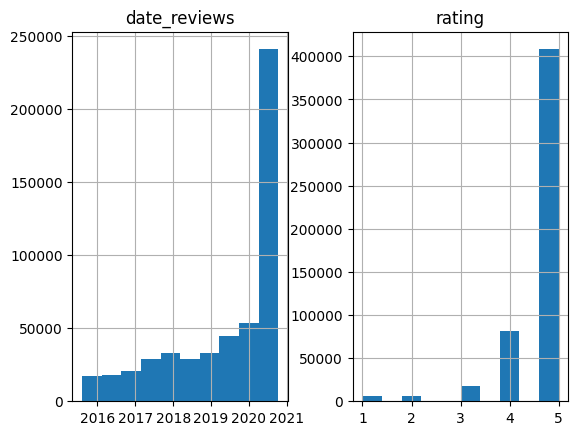

In [153]:
coursera_reviews.hist(bins=10)

Uniendo coursera_courses con coursera_reviews 

In [155]:
coursera_outer = pd.merge(coursera_courses, coursera_reviews, how= "outer")

# el inner va mediante course_id
coursera = pd.merge(coursera_courses, coursera_reviews, on= "course_id")
print(coursera_courses.shape)
print(coursera_reviews.shape)
print(coursera_outer.shape)
print(coursera.shape)

(623, 4)
(519891, 5)
(519910, 8)
(519891, 8)


### Así, trabajaremos de ahora en adelante con el dataframe llamado 'coursera', un inner join entre los datasets anteriores

In [156]:
coursera.head()

,name,institution,course_url,course_id,reviews,reviewers,date_reviews,rating
0,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,This is an extremely basic course. Machine lea...,By Deleted A,2017-03-18,1
1,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,The course is ok but the certification procedu...,By Bruno C,2015-11-09,1
2,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,"I just started week 3 , I have to admit that I...",By Fadi,2019-04-15,1
3,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,This course is absolute garbage. You get no f...,By Mathew L,2015-09-25,1
4,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,"However good the material and lectures may be,...",By Rui C,2015-12-12,1


In [158]:
coursera.describe()

,rating
count,519891.000000
mean,4.689279
std,0.710834
min,1.000000
25%,5.000000
50%,5.000000
75%,5.000000
max,5.000000


<AxesSubplot:>

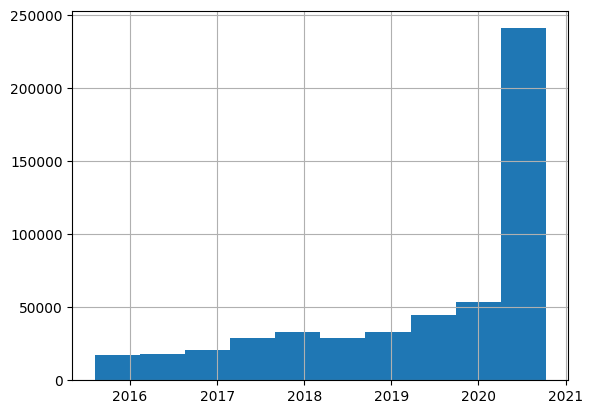

In [171]:
coursera['date_reviews'].hist(bins=10)

In [167]:
coursera['date_reviews'].value_counts()

2020-05-18    1974
2020-05-25    1968
2020-05-31    1951
2020-06-01    1945
2020-05-11    1911
              ... 
2015-08-08      19
2015-08-09      17
2015-08-11      16
2015-08-12      11
2015-08-13       9
Name: date_reviews, Length: 1892, dtype: int64

Eliminamos columnas que no serán necesarias

In [ ]:
coursera.drop(['course_url'], axis = 'columns', inplace=True)

In [180]:
coursera.head()

,name,institution,course_id,reviews,reviewers,date_reviews,rating
0,Machine Learning,Stanford University,machine-learning,This is an extremely basic course. Machine lea...,By Deleted A,2017-03-18,1
1,Machine Learning,Stanford University,machine-learning,The course is ok but the certification procedu...,By Bruno C,2015-11-09,1
2,Machine Learning,Stanford University,machine-learning,"I just started week 3 , I have to admit that I...",By Fadi,2019-04-15,1
3,Machine Learning,Stanford University,machine-learning,This course is absolute garbage. You get no f...,By Mathew L,2015-09-25,1
4,Machine Learning,Stanford University,machine-learning,"However good the material and lectures may be,...",By Rui C,2015-12-12,1


# edx_courses

Primero eliminamos duplicados

In [244]:
edx_courses.duplicated().sum()

1

In [245]:
# se eliminan
edx_courses = edx_courses.drop_duplicates()

In [246]:
edx_courses.duplicated().sum()

0

Luego los valores nulos

In [247]:
edx_courses.shape

(974, 16)

In [248]:
edx_courses.isnull().sum()

title                   0
summary                53
n_enrolled            120
course_type             0
institution             0
instructors             3
Level                   0
subject                 0
language                0
subtitles               3
course_effort           0
course_length           0
price                   0
course_description     40
course_syllabus       557
course_url              0
dtype: int64

En la columna course_syllabus hay más de la mitad de campos nulos, por tanto se va a eliminar esta columna. También la columna course_url.

También se eliminarán los registros nulos de las columnas 'subtitles' e 'instructors', pues ambas representan menos del 1% respecto a las dimensiones del dataframe. Sin embargo, es preferible no utilizar este mismo criterio para los registros con campos vacíos en las columnas 'summary', 'n_enrolled', y 'course_description', pues representan cerca del 20% respecto al número total de registros y es posible que repercuta en el análisis de datos.


In [249]:
edx_courses.drop(['course_syllabus', 'course_url'], axis = 'columns', inplace=True)


C:\Users\kaod_\AppData\Local\Temp\ipykernel_35644\3716922124.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edx_courses.drop(['course_syllabus', 'course_url'], axis = 'columns', inplace=True)


In [250]:
edx_courses.head()

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description
0,How to Learn Online,Learn essential strategies for successful onli...,"124,980",Self-paced on your time,edX,Nina Huntemann-Robyn Belair-Ben Piscopo,Introductory,Education & Teacher Training,English,English,2–3 hours per week,2 Weeks,FREE-Add a Verified Certificate for $49 USD,"Designed for those who are new to elearning, t..."
1,Programming for Everybody (Getting Started wit...,"This course is a ""no prerequisite"" introductio...","293,864",Self-paced on your time,The University of Michigan,Charles Severance,Introductory,Computer Science,English,English,2–4 hours per week,7 Weeks,FREE-Add a Verified Certificate for $49 USD,This course aims to teach everyone the basics ...
2,CS50's Introduction to Computer Science,An introduction to the intellectual enterprise...,"2,442,271",Self-paced on your time,Harvard University,David J. Malan-Doug Lloyd-Brian Yu,Introductory,Computer Science,English,English,6–18 hours per week,12 Weeks,FREE-Add a Verified Certificate for $90 USD,"This is CS50x , Harvard University's introduct..."
3,The Analytics Edge,"Through inspiring examples and stories, discov...","129,555",Instructor-led on a course schedule,Massachusetts Institute of Technology,Dimitris Bertsimas-Allison O'Hair-John Silberh...,Intermediate,Data Analysis & Statistics,English,English,10–15 hours per week,13 Weeks,FREE-Add a Verified Certificate for $199 USD,"In the last decade, the amount of data availab..."
4,Marketing Analytics: Marketing Measurement Str...,This course is part of a MicroMasters® Program,"81,140",Self-paced on your time,"University of California, Berkeley",Stephan Sorger,Introductory,Computer Science,English,English,5–7 hours per week,4 Weeks,FREE-Add a Verified Certificate for $249 USD,Begin your journey in a new career in marketin...


Hay que llenar los campos nulos para 'summary', 'n_enrolled', y 'course_description'. Para esto, hay que darle el correcto formato a las columnas

In [251]:
edx_courses.head()

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description
0,How to Learn Online,Learn essential strategies for successful onli...,"124,980",Self-paced on your time,edX,Nina Huntemann-Robyn Belair-Ben Piscopo,Introductory,Education & Teacher Training,English,English,2–3 hours per week,2 Weeks,FREE-Add a Verified Certificate for $49 USD,"Designed for those who are new to elearning, t..."
1,Programming for Everybody (Getting Started wit...,"This course is a ""no prerequisite"" introductio...","293,864",Self-paced on your time,The University of Michigan,Charles Severance,Introductory,Computer Science,English,English,2–4 hours per week,7 Weeks,FREE-Add a Verified Certificate for $49 USD,This course aims to teach everyone the basics ...
2,CS50's Introduction to Computer Science,An introduction to the intellectual enterprise...,"2,442,271",Self-paced on your time,Harvard University,David J. Malan-Doug Lloyd-Brian Yu,Introductory,Computer Science,English,English,6–18 hours per week,12 Weeks,FREE-Add a Verified Certificate for $90 USD,"This is CS50x , Harvard University's introduct..."
3,The Analytics Edge,"Through inspiring examples and stories, discov...","129,555",Instructor-led on a course schedule,Massachusetts Institute of Technology,Dimitris Bertsimas-Allison O'Hair-John Silberh...,Intermediate,Data Analysis & Statistics,English,English,10–15 hours per week,13 Weeks,FREE-Add a Verified Certificate for $199 USD,"In the last decade, the amount of data availab..."
4,Marketing Analytics: Marketing Measurement Str...,This course is part of a MicroMasters® Program,"81,140",Self-paced on your time,"University of California, Berkeley",Stephan Sorger,Introductory,Computer Science,English,English,5–7 hours per week,4 Weeks,FREE-Add a Verified Certificate for $249 USD,Begin your journey in a new career in marketin...


In [252]:
# se quitan las comas de n_enrolled y se formatea la columna a entero
edx_courses['n_enrolled'] = edx_courses['n_enrolled'].str.replace(',', '').astype(float)

C:\Users\kaod_\AppData\Local\Temp\ipykernel_35644\3765366794.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edx_courses['n_enrolled'] = edx_courses['n_enrolled'].str.replace(',', '').astype(float)


In [253]:
edx_courses.head()

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description
0,How to Learn Online,Learn essential strategies for successful onli...,124980.0,Self-paced on your time,edX,Nina Huntemann-Robyn Belair-Ben Piscopo,Introductory,Education & Teacher Training,English,English,2–3 hours per week,2 Weeks,FREE-Add a Verified Certificate for $49 USD,"Designed for those who are new to elearning, t..."
1,Programming for Everybody (Getting Started wit...,"This course is a ""no prerequisite"" introductio...",293864.0,Self-paced on your time,The University of Michigan,Charles Severance,Introductory,Computer Science,English,English,2–4 hours per week,7 Weeks,FREE-Add a Verified Certificate for $49 USD,This course aims to teach everyone the basics ...
2,CS50's Introduction to Computer Science,An introduction to the intellectual enterprise...,2442271.0,Self-paced on your time,Harvard University,David J. Malan-Doug Lloyd-Brian Yu,Introductory,Computer Science,English,English,6–18 hours per week,12 Weeks,FREE-Add a Verified Certificate for $90 USD,"This is CS50x , Harvard University's introduct..."
3,The Analytics Edge,"Through inspiring examples and stories, discov...",129555.0,Instructor-led on a course schedule,Massachusetts Institute of Technology,Dimitris Bertsimas-Allison O'Hair-John Silberh...,Intermediate,Data Analysis & Statistics,English,English,10–15 hours per week,13 Weeks,FREE-Add a Verified Certificate for $199 USD,"In the last decade, the amount of data availab..."
4,Marketing Analytics: Marketing Measurement Str...,This course is part of a MicroMasters® Program,81140.0,Self-paced on your time,"University of California, Berkeley",Stephan Sorger,Introductory,Computer Science,English,English,5–7 hours per week,4 Weeks,FREE-Add a Verified Certificate for $249 USD,Begin your journey in a new career in marketin...


Ahora, la columna n_enrolled es de tipo float. Vamos a llenar los nulos con un 0 para luego convertir a enteros.

In [254]:
edx_courses.n_enrolled = edx_courses.n_enrolled.fillna(0)

C:\Users\kaod_\AppData\Local\Temp\ipykernel_35644\3259208710.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edx_courses.n_enrolled = edx_courses.n_enrolled.fillna(0)


In [255]:
# convertimos a entero

edx_courses.n_enrolled = edx_courses.n_enrolled.astype(int)
edx_courses.dtypes

C:\Users\kaod_\AppData\Local\Temp\ipykernel_35644\3031179724.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edx_courses.n_enrolled = edx_courses.n_enrolled.astype(int)


title                 object
summary               object
n_enrolled             int32
course_type           object
institution           object
instructors           object
Level                 object
subject               object
language              object
subtitles             object
course_effort         object
course_length         object
price                 object
course_description    object
dtype: object

In [256]:
# observemos ahora una descripción de esta columna 'n_enrolled' 
edx_courses['n_enrolled'].describe()

count    9.740000e+02
mean     4.665329e+04
std      1.128702e+05
min      0.000000e+00
25%      8.523250e+03
50%      1.965050e+04
75%      4.880900e+04
max      2.442271e+06
Name: n_enrolled, dtype: float64

<AxesSubplot:>

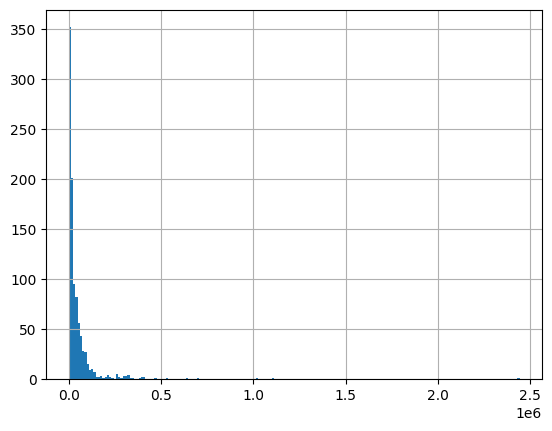

In [257]:
# hagamos un histograma, con ciertos outliars
edx_courses['n_enrolled'].hist(bins=200)

In [258]:
edx_courses['n_enrolled'].value_counts()

0        120
11426      2
10129      2
5473       2
16134      2
        ... 
35058      1
9796       1
66769      1
22366      1
8775       1
Name: n_enrolled, Length: 850, dtype: int64

In [259]:
# sustituyendo la media redondeada en los valores donde hay 0:
edx_courses['n_enrolled'] = edx_courses['n_enrolled'].replace(0, 46653)


C:\Users\kaod_\AppData\Local\Temp\ipykernel_35644\4265699941.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edx_courses['n_enrolled'] = edx_courses['n_enrolled'].replace(0, 46653)


In [260]:
# se comprueba que son exactamente los 120 valores donde había cero.
edx_courses.apply(lambda x: x['n_enrolled'] == 46653, axis=1).sum()

120

In [ ]:
''' checar course_effort para poder cuantizar variables
    formatear course_length
    formnatear el título de la columna Level
    formatear price
    checar course syllabus
    se podría eliminar la columna syllabus '''

In [261]:
edx_courses['course_length'].unique()

array(['2 Weeks', '7 Weeks', '12 Weeks', '13 Weeks', '4 Weeks', '6 Weeks',
       '10 Weeks', '8 Weeks', '5 Weeks', '16 Weeks', '15 Weeks',
       '1 Weeks', '11 Weeks', '14 Weeks', '9 Weeks', '3 Weeks',
       '18 Weeks', '17 Weeks'], dtype=object)

In [262]:
# cambiamos nombre a las columnas 'course_length' y 'Level'
edx_courses.rename({'course_length': 'course_length(weeks)', 'Level': 'level'}, axis=1, inplace= True)

C:\Users\kaod_\AppData\Local\Temp\ipykernel_35644\741756235.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edx_courses.rename({'course_length': 'course_length(weeks)', 'Level': 'level'}, axis=1, inplace= True)


In [263]:
edx_courses.head()

,title,summary,n_enrolled,course_type,institution,instructors,level,subject,language,subtitles,course_effort,course_length(weeks),price,course_description
0,How to Learn Online,Learn essential strategies for successful onli...,124980,Self-paced on your time,edX,Nina Huntemann-Robyn Belair-Ben Piscopo,Introductory,Education & Teacher Training,English,English,2–3 hours per week,2 Weeks,FREE-Add a Verified Certificate for $49 USD,"Designed for those who are new to elearning, t..."
1,Programming for Everybody (Getting Started wit...,"This course is a ""no prerequisite"" introductio...",293864,Self-paced on your time,The University of Michigan,Charles Severance,Introductory,Computer Science,English,English,2–4 hours per week,7 Weeks,FREE-Add a Verified Certificate for $49 USD,This course aims to teach everyone the basics ...
2,CS50's Introduction to Computer Science,An introduction to the intellectual enterprise...,2442271,Self-paced on your time,Harvard University,David J. Malan-Doug Lloyd-Brian Yu,Introductory,Computer Science,English,English,6–18 hours per week,12 Weeks,FREE-Add a Verified Certificate for $90 USD,"This is CS50x , Harvard University's introduct..."
3,The Analytics Edge,"Through inspiring examples and stories, discov...",129555,Instructor-led on a course schedule,Massachusetts Institute of Technology,Dimitris Bertsimas-Allison O'Hair-John Silberh...,Intermediate,Data Analysis & Statistics,English,English,10–15 hours per week,13 Weeks,FREE-Add a Verified Certificate for $199 USD,"In the last decade, the amount of data availab..."
4,Marketing Analytics: Marketing Measurement Str...,This course is part of a MicroMasters® Program,81140,Self-paced on your time,"University of California, Berkeley",Stephan Sorger,Introductory,Computer Science,English,English,5–7 hours per week,4 Weeks,FREE-Add a Verified Certificate for $249 USD,Begin your journey in a new career in marketin...


Cuantizando la columna course_length(weeks)

In [265]:
# !!!!!!
# quitamos la palabra 'Weeks' de todos los registros
# edx_courses['course_length(weeks)'] = edx_courses['course_length(weeks)'].replace('Weeks','', inplace=True)
edx_courses['course_length(weeks)'] = edx_courses['course_length(weeks)'].replace({'Weeks':''}, regex=True)

C:\Users\kaod_\AppData\Local\Temp\ipykernel_35644\2436078395.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edx_courses['course_length(weeks)'] = edx_courses['course_length(weeks)'].replace({'Weeks':''}, regex=True)


In [266]:
edx_courses.head()

,title,summary,n_enrolled,course_type,institution,instructors,level,subject,language,subtitles,course_effort,course_length(weeks),price,course_description
0,How to Learn Online,Learn essential strategies for successful onli...,124980,Self-paced on your time,edX,Nina Huntemann-Robyn Belair-Ben Piscopo,Introductory,Education & Teacher Training,English,English,2–3 hours per week,2,FREE-Add a Verified Certificate for $49 USD,"Designed for those who are new to elearning, t..."
1,Programming for Everybody (Getting Started wit...,"This course is a ""no prerequisite"" introductio...",293864,Self-paced on your time,The University of Michigan,Charles Severance,Introductory,Computer Science,English,English,2–4 hours per week,7,FREE-Add a Verified Certificate for $49 USD,This course aims to teach everyone the basics ...
2,CS50's Introduction to Computer Science,An introduction to the intellectual enterprise...,2442271,Self-paced on your time,Harvard University,David J. Malan-Doug Lloyd-Brian Yu,Introductory,Computer Science,English,English,6–18 hours per week,12,FREE-Add a Verified Certificate for $90 USD,"This is CS50x , Harvard University's introduct..."
3,The Analytics Edge,"Through inspiring examples and stories, discov...",129555,Instructor-led on a course schedule,Massachusetts Institute of Technology,Dimitris Bertsimas-Allison O'Hair-John Silberh...,Intermediate,Data Analysis & Statistics,English,English,10–15 hours per week,13,FREE-Add a Verified Certificate for $199 USD,"In the last decade, the amount of data availab..."
4,Marketing Analytics: Marketing Measurement Str...,This course is part of a MicroMasters® Program,81140,Self-paced on your time,"University of California, Berkeley",Stephan Sorger,Introductory,Computer Science,English,English,5–7 hours per week,4,FREE-Add a Verified Certificate for $249 USD,Begin your journey in a new career in marketin...


In [267]:
# cambiando 'course_length(weeks)' a 'course_length_weeks'

edx_courses.rename({'course_length(weeks)': 'course_length_weeks'}, axis=1, inplace= True)

C:\Users\kaod_\AppData\Local\Temp\ipykernel_35644\1524731273.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edx_courses.rename({'course_length(weeks)': 'course_length_weeks'}, axis=1, inplace= True)


In [269]:
# convirtiendo la columna 'course_length(weeks)' a int
edx_courses.course_length_weeks = edx_courses.course_length_weeks.astype(int)
edx_courses.dtypes

C:\Users\kaod_\AppData\Local\Temp\ipykernel_35644\1484537289.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edx_courses.course_length_weeks = edx_courses.course_length_weeks.astype(int)


title                  object
summary                object
n_enrolled              int32
course_type            object
institution            object
instructors            object
level                  object
subject                object
language               object
subtitles              object
course_effort          object
course_length_weeks     int32
price                  object
course_description     object
dtype: object

Cuantizando la columna 'price'

In [277]:
len(edx_courses['price'].unique())

47

In [276]:
edx_courses['price'].unique()

array(['FREE-Add a Verified Certificate for $49 USD',
       'FREE-Add a Verified Certificate for $90 USD',
       'FREE-Add a Verified Certificate for $199 USD',
       'FREE-Add a Verified Certificate for $249 USD',
       'FREE-Add a Verified Certificate for $5 USD',
       'FREE-Add a Verified Certificate for $99 USD',
       'FREE-Add a Verified Certificate for $39 USD',
       'FREE-Add a Verified Certificate for $399 USD',
       'FREE-Add a Verified Certificate for $149 USD',
       'FREE-Add a Verified Certificate for $125 USD',
       'FREE-Add a Verified Certificate for $40 USD',
       'FREE-Add a Verified Certificate for $25 USD',
       'FREE-Add a Verified Certificate for $50 USD',
       'FREE-Add a Verified Certificate for $169 USD',
       'FREE-Add a Verified Certificate for $70 USD',
       'FREE-Add a Verified Certificate for $79 USD',
       'FREE-Add a Verified Certificate for $150 USD',
       'FREE-Add a Verified Certificate for $69 USD',
       'FREE-Add a Ver

In [278]:
# dejemos sólo el precio en dólares, renombremos la columna y cuanticemos
edx_courses.rename({'price': 'price_usd'}, axis=1, inplace= True)

C:\Users\kaod_\AppData\Local\Temp\ipykernel_35644\875382356.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edx_courses.rename({'price': 'price_usd'}, axis=1, inplace= True)


In [284]:

edx_courses['price_usd'] = edx_courses['price_usd'].replace({'FREE-Add':''},
                                                            regex=True)

C:\Users\kaod_\AppData\Local\Temp\ipykernel_35644\1972696085.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edx_courses['price_usd'] = edx_courses['price_usd'].replace({'FREE-Add':''},


In [286]:
edx_courses['price_usd'] = edx_courses['price_usd'].replace({'a Verified Certificate for ':''},
                                                            regex=True)

C:\Users\kaod_\AppData\Local\Temp\ipykernel_35644\1408589513.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edx_courses['price_usd'] = edx_courses['price_usd'].replace({'a Verified Certificate for ':''},


In [288]:

edx_courses['price_usd'] = edx_courses['price_usd'].replace({' USD':''},
                                                            regex=True)

C:\Users\kaod_\AppData\Local\Temp\ipykernel_35644\2270686836.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edx_courses['price_usd'] = edx_courses['price_usd'].replace({'$':''},
C:\Users\kaod_\AppData\Local\Temp\ipykernel_35644\2270686836.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edx_courses['price_usd'] = edx_courses['price_usd'].replace({' USD':''},


In [292]:
edx_courses["price_usd"] = edx_courses["price_usd"].apply(lambda x: x.replace("$",""))

C:\Users\kaod_\AppData\Local\Temp\ipykernel_35644\3147386402.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edx_courses["price_usd"] = edx_courses["price_usd"].apply(lambda x: x.replace("$",""))


In [293]:
edx_courses.head()

,title,summary,n_enrolled,course_type,institution,instructors,level,subject,language,subtitles,course_effort,course_length_weeks,price_usd,course_description
0,How to Learn Online,Learn essential strategies for successful onli...,124980,Self-paced on your time,edX,Nina Huntemann-Robyn Belair-Ben Piscopo,Introductory,Education & Teacher Training,English,English,2–3 hours per week,2,49,"Designed for those who are new to elearning, t..."
1,Programming for Everybody (Getting Started wit...,"This course is a ""no prerequisite"" introductio...",293864,Self-paced on your time,The University of Michigan,Charles Severance,Introductory,Computer Science,English,English,2–4 hours per week,7,49,This course aims to teach everyone the basics ...
2,CS50's Introduction to Computer Science,An introduction to the intellectual enterprise...,2442271,Self-paced on your time,Harvard University,David J. Malan-Doug Lloyd-Brian Yu,Introductory,Computer Science,English,English,6–18 hours per week,12,90,"This is CS50x , Harvard University's introduct..."
3,The Analytics Edge,"Through inspiring examples and stories, discov...",129555,Instructor-led on a course schedule,Massachusetts Institute of Technology,Dimitris Bertsimas-Allison O'Hair-John Silberh...,Intermediate,Data Analysis & Statistics,English,English,10–15 hours per week,13,199,"In the last decade, the amount of data availab..."
4,Marketing Analytics: Marketing Measurement Str...,This course is part of a MicroMasters® Program,81140,Self-paced on your time,"University of California, Berkeley",Stephan Sorger,Introductory,Computer Science,English,English,5–7 hours per week,4,249,Begin your journey in a new career in marketin...


In [297]:
# cambiando price_usd de object a float
edx_courses.price_usd = edx_courses.price_usd.astype(float)
edx_courses.dtypes


C:\Users\kaod_\AppData\Local\Temp\ipykernel_35644\2820245710.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edx_courses.price_usd = edx_courses.price_usd.astype(float)


title                   object
summary                 object
n_enrolled               int32
course_type             object
institution             object
instructors             object
level                   object
subject                 object
language                object
subtitles               object
course_effort           object
course_length_weeks      int32
price_usd              float64
course_description      object
dtype: object

In [298]:
edx_courses['level'].value_counts()

Introductory    621
Intermediate    266
Advanced         87
Name: level, dtype: int64

<AxesSubplot:>

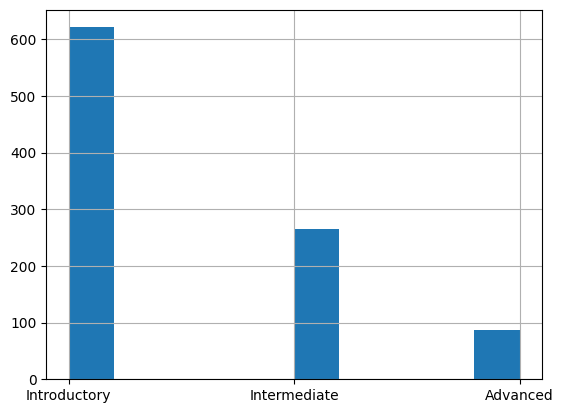

In [299]:
edx_courses['level'].hist()

<AxesSubplot:>

C:\Users\kaod_\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\kaod_\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26412 (\N{CJK UNIFIED IDEOGRAPH-672C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\kaod_\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 35486 (\N{CJK UNIFIED IDEOGRAPH-8A9E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\kaod_\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 20013 (\N{CJK UNIFIED IDEOGRAPH-4E2D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\kaod_\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 259

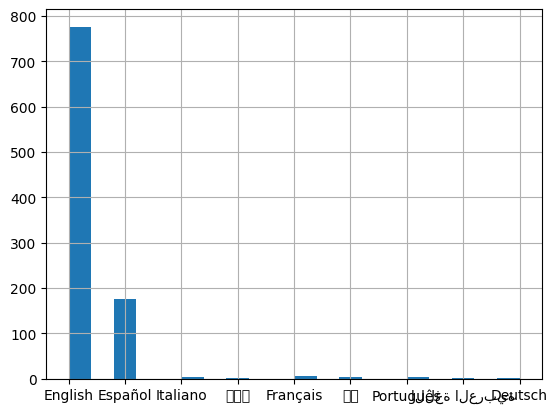

In [305]:
edx_courses['language'].hist(bins=20)

In [307]:
edx_courses.dtypes

title                   object
summary                 object
n_enrolled               int32
course_type             object
institution             object
instructors             object
level                   object
subject                 object
language                object
subtitles               object
course_effort           object
course_length_weeks      int32
price_usd              float64
course_description      object
dtype: object

Matriz de correlación

array([[<AxesSubplot:xlabel='n_enrolled', ylabel='n_enrolled'>,
        <AxesSubplot:xlabel='course_length_weeks', ylabel='n_enrolled'>,
        <AxesSubplot:xlabel='price_usd', ylabel='n_enrolled'>],
       [<AxesSubplot:xlabel='n_enrolled', ylabel='course_length_weeks'>,
        <AxesSubplot:xlabel='course_length_weeks', ylabel='course_length_weeks'>,
        <AxesSubplot:xlabel='price_usd', ylabel='course_length_weeks'>],
       [<AxesSubplot:xlabel='n_enrolled', ylabel='price_usd'>,
        <AxesSubplot:xlabel='course_length_weeks', ylabel='price_usd'>,
        <AxesSubplot:xlabel='price_usd', ylabel='price_usd'>]],
      dtype=object)

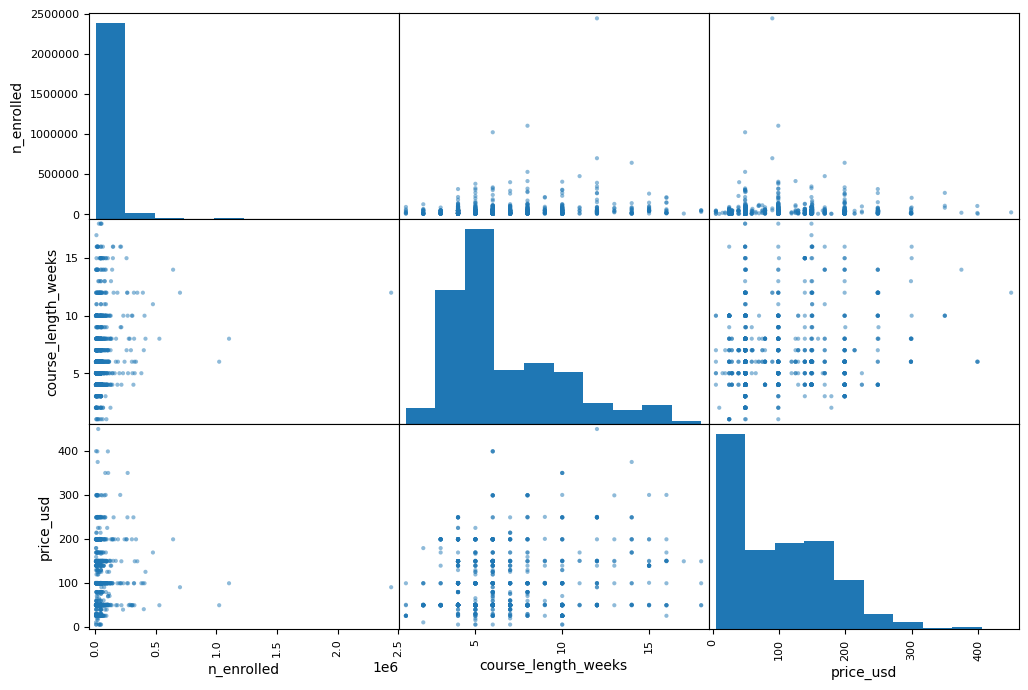

In [308]:
from pandas.plotting import scatter_matrix
columnas_edx = ['n_enrolled', 'course_length_weeks', 'price_usd', 'level', 'language']

scatter_matrix(edx_courses[columnas_edx], figsize=(12, 8))

# udemy_courses

In [ ]:
'''
formatear published_timestamp. Quizá se tenga que partir en dos columnas, una de fecha y otra de hora
'''

Comenzamos eliminando las columnas 'course_id' y 'url'

In [310]:
udemy_courses.drop(['course_id', 'url'], axis = 'columns', inplace=True)

Se eliminan los registros que contengan False en la columna is_paid, solo nos interesan las ventas 

In [315]:
print('las dimensiones son: ', udemy_courses.shape)
print(len(udemy_courses[(udemy_courses['is_paid'] == False)]))

las dimensiones son:  (3678, 10)
310


In [316]:
udemy_courses.drop(udemy_courses[(udemy_courses['is_paid'] == False)].index, inplace=True)

In [317]:
# confirmando
print('las dimensiones son: ', udemy_courses.shape)
print(len(udemy_courses[(udemy_courses['is_paid'] == False)]))

las dimensiones son:  (3368, 10)
0


una vez hecho esto, podemos eliminar la columna 'is_paid'

In [327]:
udemy_courses.drop(['is_paid'], axis = 'columns', inplace=True)

Eliminamos lo duplicados

In [323]:
print('las dimensiones son: ', udemy_courses.shape)
udemy_courses.duplicated().sum()

las dimensiones son:  (3368, 10)


6

In [324]:
# se eliminan los duplicados
udemy_courses = udemy_courses.drop_duplicates()

In [329]:
# se confirma
print('las dimensiones son: ', udemy_courses.shape)
udemy_courses.duplicated().sum()

las dimensiones son:  (3362, 9)


0

In [330]:
udemy_courses.dtypes

course_title            object
price                    int64
num_subscribers          int64
num_reviews              int64
num_lectures             int64
level                   object
content_duration       float64
published_timestamp     object
subject                 object
dtype: object

Formatear la columna published_timestamp

Solo nos interesa la fecha en año-día-mes, así que separaremos primero y luego daremos formato

In [332]:
'''name = df["name"].str.split(expand=True)
name.columns = ['first_name', 'last_name']
df = pd.concat([df, name], axis=1)
df'''

dividido = udemy_courses["published_timestamp"].str.split('T', expand=True)
dividido

,0,1
0,2017-01-18,20:58:58Z
1,2017-03-09,16:34:20Z
2,2016-12-19,19:26:30Z
3,2017-05-30,20:07:24Z
4,2016-12-13,14:57:18Z
...,...,...
3673,2016-06-14,17:36:46Z
3674,2017-03-10,22:24:30Z
3675,2015-12-30,16:41:42Z
3676,2016-08-11,19:06:15Z


Nombramos las columnas

In [337]:
dividido.columns = ['date', 'hour']

In [338]:
dividido.head()

,date,hour
0,2017-01-18,20:58:58Z
1,2017-03-09,16:34:20Z
2,2016-12-19,19:26:30Z
3,2017-05-30,20:07:24Z
4,2016-12-13,14:57:18Z


Eliminamos la columna hour de dividido

In [339]:
dividido.drop(['hour'], axis = 'columns', inplace=True)

concatenamos 'dividido' con 'udemy_courses'

In [341]:
udemy_courses = pd.concat([udemy_courses, dividido], axis=1)

formateamos la nueva columna 'date'

In [344]:
udemy_courses['date'] = pd.to_datetime(udemy_courses['date'])

eliminamos 'published_timestamp'

In [346]:
udemy_courses.drop(['published_timestamp'], axis = 'columns', inplace=True)

In [349]:
udemy_courses['content_duration'].describe()

count    3362.000000
mean        4.271584
std         6.254162
min         0.000000
25%         1.500000
50%         2.500000
75%         4.500000
max        78.500000
Name: content_duration, dtype: float64

In [347]:
udemy_courses.head()

,course_title,price,num_subscribers,num_reviews,num_lectures,level,content_duration,subject,date
0,Ultimate Investment Banking Course,200,2147,23,51,All Levels,1.5,Business Finance,2017-01-18
1,Complete GST Course & Certification - Grow You...,75,2792,923,274,All Levels,39.0,Business Finance,2017-03-09
2,Financial Modeling for Business Analysts and C...,45,2174,74,51,Intermediate Level,2.5,Business Finance,2016-12-19
3,Beginner to Pro - Financial Analysis in Excel ...,95,2451,11,36,All Levels,3.0,Business Finance,2017-05-30
4,How To Maximize Your Profits Trading Options,200,1276,45,26,Intermediate Level,2.0,Business Finance,2016-12-13


In [353]:
udemy_courses.dtypes

course_title                object
price                        int64
num_subscribers              int64
num_reviews                  int64
num_lectures                 int64
level                       object
content_duration           float64
subject                     object
date                datetime64[ns]
dtype: object

Matrices de correlación

array([[<AxesSubplot:xlabel='price', ylabel='price'>,
        <AxesSubplot:xlabel='num_reviews', ylabel='price'>],
       [<AxesSubplot:xlabel='price', ylabel='num_reviews'>,
        <AxesSubplot:xlabel='num_reviews', ylabel='num_reviews'>]],
      dtype=object)

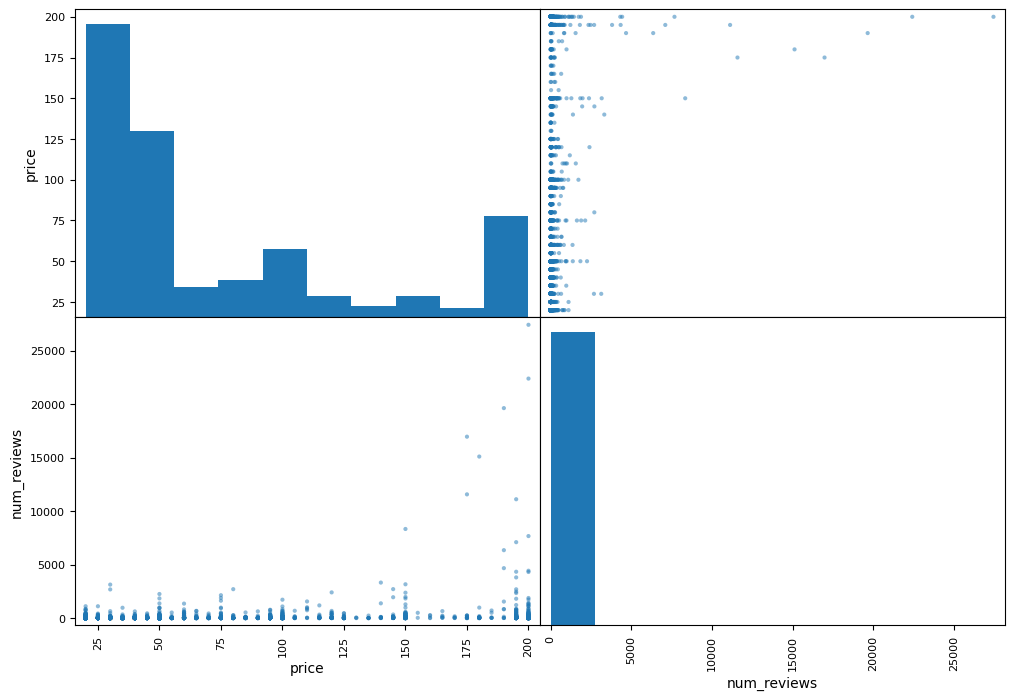

In [350]:
columnas_udemy = ['price', 'level', 'num_reviews', 'subject']

scatter_matrix(udemy_courses[columnas_udemy], figsize=(12, 8))

In [352]:
coursera.head()

,name,institution,course_id,reviews,reviewers,date_reviews,rating
0,Machine Learning,Stanford University,machine-learning,This is an extremely basic course. Machine lea...,By Deleted A,2017-03-18,1
1,Machine Learning,Stanford University,machine-learning,The course is ok but the certification procedu...,By Bruno C,2015-11-09,1
2,Machine Learning,Stanford University,machine-learning,"I just started week 3 , I have to admit that I...",By Fadi,2019-04-15,1
3,Machine Learning,Stanford University,machine-learning,This course is absolute garbage. You get no f...,By Mathew L,2015-09-25,1
4,Machine Learning,Stanford University,machine-learning,"However good the material and lectures may be,...",By Rui C,2015-12-12,1


In [354]:
edx_courses.head()

,title,summary,n_enrolled,course_type,institution,instructors,level,subject,language,subtitles,course_effort,course_length_weeks,price_usd,course_description
0,How to Learn Online,Learn essential strategies for successful onli...,124980,Self-paced on your time,edX,Nina Huntemann-Robyn Belair-Ben Piscopo,Introductory,Education & Teacher Training,English,English,2–3 hours per week,2,49.0,"Designed for those who are new to elearning, t..."
1,Programming for Everybody (Getting Started wit...,"This course is a ""no prerequisite"" introductio...",293864,Self-paced on your time,The University of Michigan,Charles Severance,Introductory,Computer Science,English,English,2–4 hours per week,7,49.0,This course aims to teach everyone the basics ...
2,CS50's Introduction to Computer Science,An introduction to the intellectual enterprise...,2442271,Self-paced on your time,Harvard University,David J. Malan-Doug Lloyd-Brian Yu,Introductory,Computer Science,English,English,6–18 hours per week,12,90.0,"This is CS50x , Harvard University's introduct..."
3,The Analytics Edge,"Through inspiring examples and stories, discov...",129555,Instructor-led on a course schedule,Massachusetts Institute of Technology,Dimitris Bertsimas-Allison O'Hair-John Silberh...,Intermediate,Data Analysis & Statistics,English,English,10–15 hours per week,13,199.0,"In the last decade, the amount of data availab..."
4,Marketing Analytics: Marketing Measurement Str...,This course is part of a MicroMasters® Program,81140,Self-paced on your time,"University of California, Berkeley",Stephan Sorger,Introductory,Computer Science,English,English,5–7 hours per week,4,249.0,Begin your journey in a new career in marketin...


In [356]:
edx_courses.dtypes

title                   object
summary                 object
n_enrolled               int32
course_type             object
institution             object
instructors             object
level                   object
subject                 object
language                object
subtitles               object
course_effort           object
course_length_weeks      int32
price_usd              float64
course_description      object
dtype: object

In [355]:
udemy_courses.head()

,course_title,price,num_subscribers,num_reviews,num_lectures,level,content_duration,subject,date
0,Ultimate Investment Banking Course,200,2147,23,51,All Levels,1.5,Business Finance,2017-01-18
1,Complete GST Course & Certification - Grow You...,75,2792,923,274,All Levels,39.0,Business Finance,2017-03-09
2,Financial Modeling for Business Analysts and C...,45,2174,74,51,Intermediate Level,2.5,Business Finance,2016-12-19
3,Beginner to Pro - Financial Analysis in Excel ...,95,2451,11,36,All Levels,3.0,Business Finance,2017-05-30
4,How To Maximize Your Profits Trading Options,200,1276,45,26,Intermediate Level,2.0,Business Finance,2016-12-13


In [357]:
coursera.to_csv('coursera_c.csv')
edx_courses.to_csv('edx_c.csv')
udemy_courses.to_csv('udemy_c.cv')